In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reading the dataset

In [2]:
path = 'https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/bootcamp/random_forest_regression/advertising.csv'
data = pd.read_csv(path)

In [3]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#Defining the inputs and outputs features
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [5]:
X.shape

(200, 3)

In [6]:
y.shape

(200,)

In [7]:
#Defining training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=43)

### Defining and training the random forest regression

In [8]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor()
forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
#Prediction on test data

y_predict = forest_regressor.predict(X_test)

In [11]:
pd.DataFrame(data = {'Predict_values': y_predict , 'Actual_Values': y_test})

,Predict_values,Actual_Values
56,5.951,5.5
37,13.896,14.7
67,12.138,13.4
79,11.467,11.0
80,11.910,11.8
188,18.910,20.9
183,25.252,26.2
10,9.309,12.6
128,22.987,24.7
62,19.496,20.7


### Evaluating the performance (r2,MSE, Adjust MSE)


In [13]:
from sklearn.metrics import r2_score , mean_squared_error


In [16]:
#Mean Squarred Error

MSE = mean_squared_error(y_predict,y_test)
print('Mean Squarred Error is :', MSE)

Mean Squarred Error is : 1.4910632749999981


In [18]:
# R2 squarred
r2 = r2_score(y_predict,y_test)
print('R2 score is :', r2)

R2 score is : 0.9421527329241224


In [19]:
#Root Mean Squarred Error
import math
RMSE = math.sqrt(MSE)
print('Root Mean Squarred Error is :', RMSE)

Root Mean Squarred Error is : 1.2210910183110832


In [26]:
#Adjusted  R2 squarred
adj = 1 - ((1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))

print(' Adjusted R2 squarred is :', adj)

 Adjusted R2 squarred is : 0.9410402854803555


In [28]:
import seaborn as sns

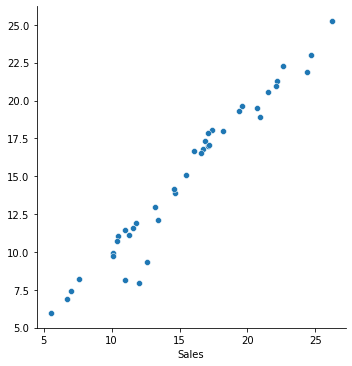

In [38]:
sns.relplot(x = y_test , y=y_predict)
